In [ ]:
### Author : Vasista
### Date   : 12/11/2018
### Topic  : ML Regression Models Templates

In [ ]:
# How To Improve Any Machine Learning Model
# 1. Use more (high-quality) data and feature engineering / imp Features / feature extraction.
# 2. Tune the Hyperparameters of the Algorithm.
# 3. Try different algorithms.

In [26]:
# Importing Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import time
import timeit

In [3]:
data = pd.read_csv('C:\Piazza\CUTe2\Retail_Train.csv')

retail = data.copy()
retail = retail.drop(labels='PersonID',axis=1)

# Feature Engineering
data['totalVisits'] = data['DirectVisits'] + data['OnlineVisits']
retail_new = data.drop(labels=['OnlineVisits', 'DirectVisits'],axis=1)

# dType Conversion of Columns
retail_new['FamilySize'] = retail_new['FamilySize'].astype('object')
retail_new['TransactionMode'] = retail_new['TransactionMode'].astype('object')
retail_new['Occupation'] = retail_new['Occupation'].astype('object')

# One Hot Encoding
retail_new1 = pd.get_dummies(retail_new)

In [ ]:
# Train Test Split

In [ ]:
X = retail_new1.loc[:, retail_new1.columns != 'Amount']
Y = retail_new1[['Amount']]
trainX, testX, trainY, testY = train_test_split(X,Y, test_size=0.3, random_state = 42)   # Splitting


# Linear Regression

In [36]:

params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

lm = LinearRegression()
grid_cv1 = GridSearchCV(lm, param_grid=params, cv = 10)
grid_cv1.fit(trainX , trainY)            # Training

y_pred = grid_cv1.predict(testX)        # Prediction / Testing

print(mean_absolute_error(testY , y_pred))              # MAE
print("RMSE: %.2f" % math.sqrt(mean_squared_error(testY, y_pred)))    # RMSE
print("r2 / variance : ", grid_cv1.best_score_)                         # Best R^2 / Variance


print("Best Parameters : ",grid_cv1.best_params_)
grid_cv1.best_estimator_

818.8747588075555
RMSE: 1191.69
r2 / variance :  0.6948719251750077
Best Parameters :  {'copy_X': True, 'fit_intercept': False, 'normalize': True}


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)

In [16]:
# Checking Important Features In Linear Regression

lm1.coef_

array([[-6.29565185e+00, -4.17803422e-01,  4.35901873e-02,
        -2.69649665e+02,  2.34901197e+02, -1.64966129e+02,
        -4.85479814e+01, -4.55476291e+01, -2.47583744e+02,
         6.33091516e+01,  3.24050085e+02,  9.76321921e+02,
        -1.12498845e+03,  1.15712254e+03, -8.89169764e+02,
        -1.73539564e+02,  1.73539564e+02, -1.14404823e+02,
         1.14404823e+02, -3.34003252e+00, -1.61372742e+01,
         1.94773068e+01]])

# Decision Tree Regressior

In [37]:
from sklearn.tree import DecisionTreeRegressor

params = {'criterion':['rmse','mse'],'max_depth':[2,3,4,5,6],'max_features':["auto","sqrt","log2"],'min_samples_leaf':[1,2,3,4,5,6],
          'min_samples_leaf':[1,2,3,4,5,6],'max_leaf_nodes':[1,2,3,4,5,6],'min_impurity_decrease':[0.0,0.5,1.0,1.5,2.0],
          'min_samples_split':[2,3,4,5,6,7,8],'splitter':['best'],'random_state':[24]
          }
start = timeit.default_timer()        # Timer  Start

regressor = DecisionTreeRegressor()
grid_cv2 = GridSearchCV(regressor, param_grid = params, n_jobs=-1, cv=10)
grid_cv2.fit(trainX, trainY)

stop = timeit.default_timer()        # Timer End
print('Time: ', stop - start)       # Calculating Time Taken By Model

y_pred = grid_cv2.predict(testX)

print("Best Hyper Parameters:",grid_cv2.best_params_)            # Best Parameters
print("Best MAE:",mean_absolute_error(y_caps,testY))             # Best Score/Error
print("Best MSE:",mean_squared_error(y_caps,testY))              # BEst MSE
print("Best RMSE:",math.sqrt(mean_squared_error(y_caps,testY))   # Best RMSE
# print("Best R^2 :", r2_score(y_caps, testY))                     # Best R^2

SyntaxError: invalid syntax (<ipython-input-37-2a8c2c5b893d>, line 22)

# Visualizing Decision Tree

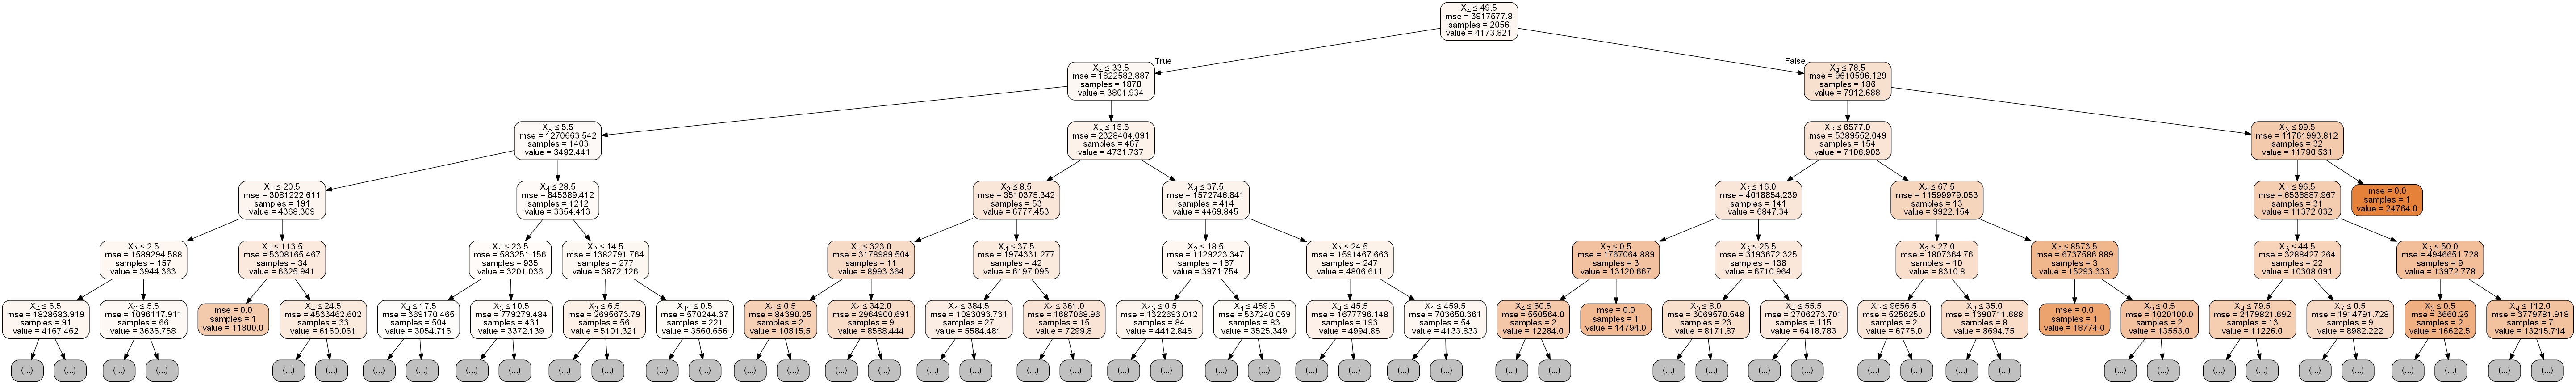

In [8]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regressor, out_file = dot_data, max_depth=5, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# questions to ask
# 1. best coefficients for any model after GridSearchCv
# 2. when to do Regularization / PCA before/after GridSearchCv
# 3. Standerdization and Normalization when to use what.
# 4. which one to use for finding imp_features regularization/pca/random forest
# 5. how to know which variables imp 
# 6. plots after building models
# 7. how to check wtether model doing bias or variance 
# 8. should I build final models for all using imp_features, cv,GridSearchCv, controlled bias/variance. 